# To predict if there were any survivors in the titanic:

There are certain parameters being provided to us, on the basis of which we have to predict if the passenger survived or not.

## Problem statement:

There is a ship and is sinking, we have to predics if the passenger survived or not based on the provided data.

## Data:

The data is split into 2 files, train and test. Each of them have multiple features that need to be accounted for the predictions.

## Evaluation:

It is a classeification model so we have to atleast get the predictions above a 90% accuracy.

## Features:

There are multiple columns wach having its own characteristics.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [5]:
train_data = pd.read_csv("train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data["Name"].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [6]:
data_mod = train_data.drop("Name",axis=1)
data_mod.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data_mod["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [8]:
data_mod["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [9]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
data_mod.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_is_missing      0
dtype: int64

In [11]:
for label, content in data_mod.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data_mod[label+"_is_missing"] = pd.isnull(content)
            data_mod[label] = content.fillna(content.median())

In [15]:
for label, content in data_mod.items():
    if not pd.api.types.is_numeric_dtype(content):
        data_mod[label+"_is_missing"] = pd.isnull(content)
        data_mod[label] = pd.Categorical(content).codes +1

In [16]:
data_mod

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,1,0,3,2,22.0,1,0,524,7.2500,0,3,False,False,False,True,False
1,2,1,1,1,38.0,1,0,597,71.2833,82,1,False,False,False,False,False
2,3,1,3,1,26.0,0,0,670,7.9250,0,3,False,False,False,True,False
3,4,1,1,1,35.0,1,0,50,53.1000,56,3,False,False,False,False,False
4,5,0,3,2,35.0,0,0,473,8.0500,0,3,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2,27.0,0,0,102,13.0000,0,3,False,False,False,True,False
887,888,1,1,1,19.0,0,0,15,30.0000,31,3,False,False,False,False,False
888,889,0,3,1,28.0,1,2,676,23.4500,0,3,True,False,False,True,False
889,890,1,1,2,26.0,0,0,9,30.0000,61,1,False,False,False,False,False


In [17]:
data_mod.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
PassengerId,1.000000e+00,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.000637,0.012985,-0.020167,NaN,NaN,-0.019919,-6.756184e-19
Survived,-5.006661e-03,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,0.276235,-0.176509,-0.092197,NaN,NaN,-0.316912,6.009485e-02
Pclass,-3.514399e-02,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,-0.537419,0.173511,0.172933,NaN,NaN,0.725541,-7.428233e-02
Sex,4.293888e-02,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,-0.137704,0.118492,0.055215,NaN,NaN,0.140391,-6.429648e-02
Age,3.421211e-02,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,0.164550,-0.031903,-0.052098,NaN,NaN,-0.240314,7.522869e-02
SibSp,-5.752683e-02,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,-0.024829,0.071480,0.018958,NaN,NaN,0.040460,-2.250825e-02
Parch,-1.652012e-03,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.033585,0.043351,-0.124104,NaN,NaN,-0.036987,-2.246691e-02
Ticket,-5.655365e-02,-0.164549,0.319869,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.176515,0.011146,0.031241,NaN,NaN,0.249303,-7.242787e-02
Fare,1.265822e-02,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,0.310987,-0.230365,-0.100707,NaN,NaN,-0.482075,4.564557e-02
Cabin,-6.371446e-04,0.276235,-0.537419,-0.137704,0.164550,-0.024829,0.033585,-0.176515,0.310987,1.000000,-0.070245,-0.130797,NaN,NaN,-0.848723,5.438031e-03


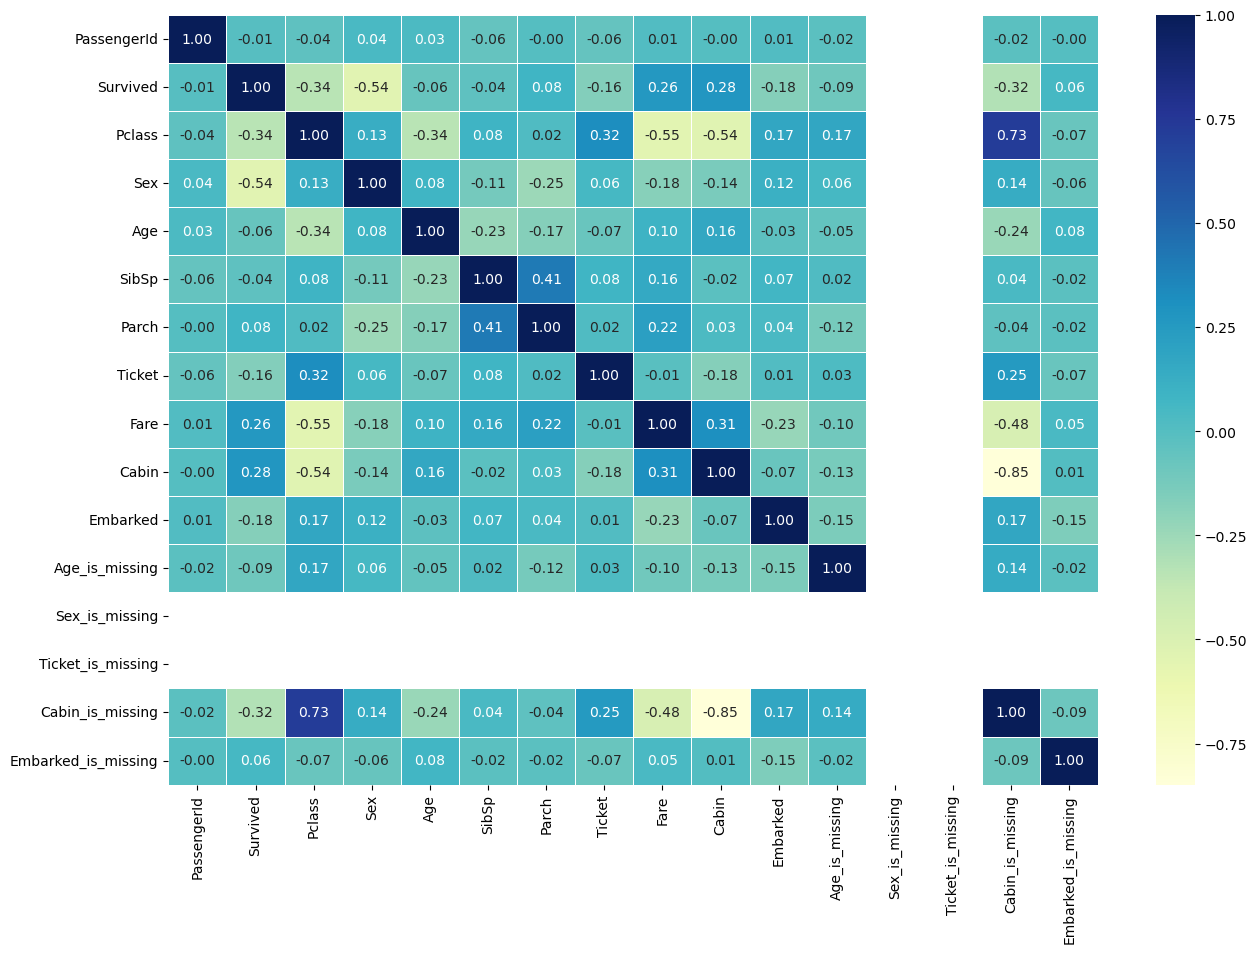

In [21]:
corr_matrix = data_mod.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

In [25]:
# data_mod.drop("Sex_is_missing", axis=1, inplace=True)
data_mod.drop("Ticket_is_missing", axis=1, inplace=True)

In [26]:
data_mod

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Cabin_is_missing,Embarked_is_missing
0,1,0,3,2,22.0,1,0,524,7.2500,0,3,False,True,False
1,2,1,1,1,38.0,1,0,597,71.2833,82,1,False,False,False
2,3,1,3,1,26.0,0,0,670,7.9250,0,3,False,True,False
3,4,1,1,1,35.0,1,0,50,53.1000,56,3,False,False,False
4,5,0,3,2,35.0,0,0,473,8.0500,0,3,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2,27.0,0,0,102,13.0000,0,3,False,True,False
887,888,1,1,1,19.0,0,0,15,30.0000,31,3,False,False,False
888,889,0,3,1,28.0,1,2,676,23.4500,0,3,True,True,False
889,890,1,1,2,26.0,0,0,9,30.0000,61,1,False,False,False


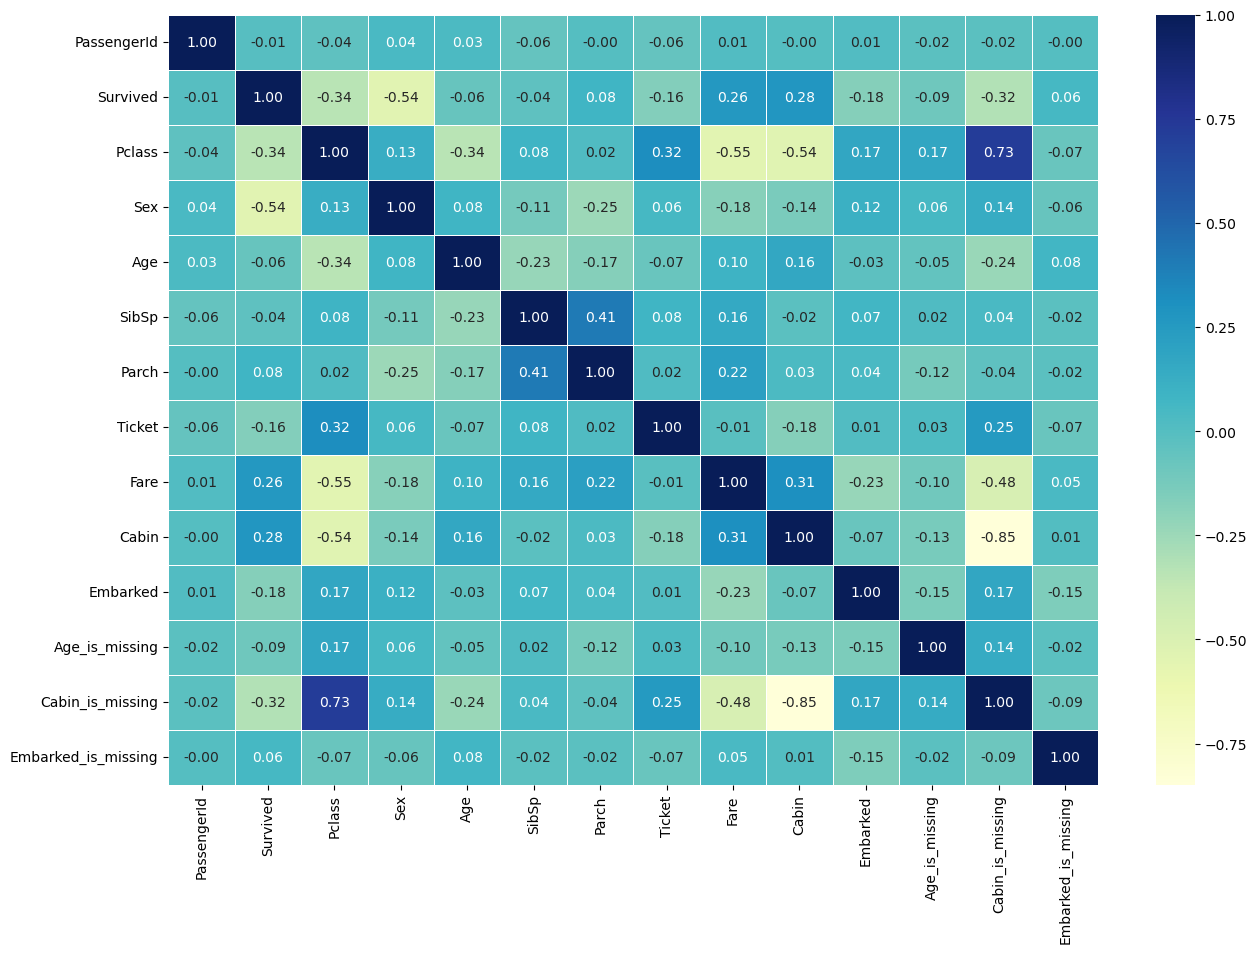

In [27]:
corr_matrix = data_mod.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

In [28]:
test = pd.read_csv("test.csv")

In [29]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
X = data_mod.drop("Survived", axis=1)
y = data_mod["Survived"]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [33]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
model.score(X_val, y_val)

0.8715083798882681

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
models = {"Logistic Regression": LogisticRegression(),"KNN": KNeighborsClassifier(),"Random Forest":RandomForestClassifier()}

def fit_and_score(models, X_train, X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [38]:
scores = fit_and_score(models, X_train, X_val, y_train, y_val)
scores

C:\Users\karti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\karti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

{'Logistic Regression': 0.8379888268156425,
 'KNN': 0.6927374301675978,
 'Random Forest': 0.8715083798882681}

In [39]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}
rf_model = RandomizedSearchCV(RandomForestClassifier(), param_distributions=grid, cv=5, n_iter =100, verbose =2)
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [40]:
rf_model.best_params_

{'n_estimators': 160,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [41]:
rf_model.score(X_val, y_val)

0.8659217877094972

In [42]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gs_model = GridSearchCV(RandomForestClassifier(), param_grid=hyperF, cv=5, verbose=1, n_jobs=-1)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 300, 500, 800, 1200]},
             verbose=1)

In [43]:
gs_model.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [44]:
gs_model.score(X_val, y_val)

0.8770949720670391

In [45]:
gs_model.fit(X, y)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 300, 500, 800, 1200]},
             verbose=1)

In [47]:
test.drop("Name", axis=1, inplace = True)

In [58]:
# preprocessing the test data, ie changing into the desired form the way the model has been trained on: 
for label, content in test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            test[label+"_is_missing"] = pd.isnull(content)
            data_mod[label] = content.fillna(content.median())
for label, content in test.items():
    if not pd.api.types.is_numeric_dtype(content):
        test[label+"_is_missing"] = pd.isnull(content)
        test[label] = pd.Categorical(content).codes +1

In [54]:
test.drop("Ticket", axis=1, inplace=True)

In [50]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Cabin_is_missing,Embarked_is_missing
0,1,3,2,22.0,1,0,524,7.2500,0,3,False,True,False
1,2,1,1,38.0,1,0,597,71.2833,82,1,False,False,False
2,3,3,1,26.0,0,0,670,7.9250,0,3,False,True,False
3,4,1,1,35.0,1,0,50,53.1000,56,3,False,False,False
4,5,3,2,35.0,0,0,473,8.0500,0,3,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,2,27.0,0,0,102,13.0000,0,3,False,True,False
887,888,1,1,19.0,0,0,15,30.0000,31,3,False,False,False
888,889,3,1,28.0,1,2,676,23.4500,0,3,True,True,False
889,890,1,2,26.0,0,0,9,30.0000,61,1,False,False,False


In [59]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_is_missing,Fare_is_missing,Cabin_is_missing,Embarked_is_missing,Sex_is_missing
0,892,3,2,34.5,0,0,7.8292,0,2,False,False,True,False,False
1,893,3,1,47.0,1,0,7.0000,0,3,False,False,True,False,False
2,894,2,2,62.0,0,0,9.6875,0,2,False,False,True,False,False
3,895,3,2,27.0,0,0,8.6625,0,3,False,False,True,False,False
4,896,3,1,22.0,1,1,12.2875,0,3,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,2,NaN,0,0,8.0500,0,3,True,False,True,False,False
414,1306,1,1,39.0,0,0,108.9000,23,1,False,False,False,False,False
415,1307,3,2,38.5,0,0,7.2500,0,3,False,False,True,False,False
416,1308,3,2,NaN,0,0,8.0500,0,3,True,False,True,False,False


In [60]:
df = pd.read_csv("test.csv")

In [61]:
df.drop("Name", axis=1, inplace = True)

In [62]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S


In [63]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = content.fillna(content.median())
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label+"_is_missing"] = pd.isnull(content)
        df[label] = pd.Categorical(content).codes +1

In [64]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Fare_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,892,3,2,34.5,0,0,153,7.8292,0,2,False,False,False,False,True,False
1,893,3,1,47.0,1,0,222,7.0000,0,3,False,False,False,False,True,False
2,894,2,2,62.0,0,0,74,9.6875,0,2,False,False,False,False,True,False
3,895,3,2,27.0,0,0,148,8.6625,0,3,False,False,False,False,True,False
4,896,3,1,22.0,1,1,139,12.2875,0,3,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,2,27.0,0,0,268,8.0500,0,3,True,False,False,False,True,False
414,1306,1,1,39.0,0,0,325,108.9000,23,1,False,False,False,False,False,False
415,1307,3,2,38.5,0,0,347,7.2500,0,3,False,False,False,False,True,False
416,1308,3,2,27.0,0,0,221,8.0500,0,3,True,False,False,False,True,False


In [65]:
df.drop("Sex_is_missing", axis=1, inplace=True)
df.drop("Ticket_is_missing", axis=1, inplace=True)

In [66]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Fare_is_missing,Cabin_is_missing,Embarked_is_missing
0,892,3,2,34.5,0,0,153,7.8292,0,2,False,False,True,False
1,893,3,1,47.0,1,0,222,7.0000,0,3,False,False,True,False
2,894,2,2,62.0,0,0,74,9.6875,0,2,False,False,True,False
3,895,3,2,27.0,0,0,148,8.6625,0,3,False,False,True,False
4,896,3,1,22.0,1,1,139,12.2875,0,3,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,2,27.0,0,0,268,8.0500,0,3,True,False,True,False
414,1306,1,1,39.0,0,0,325,108.9000,23,1,False,False,False,False
415,1307,3,2,38.5,0,0,347,7.2500,0,3,False,False,True,False
416,1308,3,2,27.0,0,0,221,8.0500,0,3,True,False,True,False


In [67]:
set(df)-set(X)

{'Fare_is_missing'}

In [68]:
df.drop("Fare_is_missing", axis=1, inplace=True)
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Cabin_is_missing,Embarked_is_missing
0,892,3,2,34.5,0,0,153,7.8292,0,2,False,True,False
1,893,3,1,47.0,1,0,222,7.0000,0,3,False,True,False
2,894,2,2,62.0,0,0,74,9.6875,0,2,False,True,False
3,895,3,2,27.0,0,0,148,8.6625,0,3,False,True,False
4,896,3,1,22.0,1,1,139,12.2875,0,3,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,2,27.0,0,0,268,8.0500,0,3,True,True,False
414,1306,1,1,39.0,0,0,325,108.9000,23,1,False,False,False
415,1307,3,2,38.5,0,0,347,7.2500,0,3,False,True,False
416,1308,3,2,27.0,0,0,221,8.0500,0,3,True,True,False


In [69]:
y_pred = gs_model.predict(df)

In [74]:
submission = pd.DataFrame()
submission["PassengerId"] = df["PassengerId"]
submission["Survived"] = y_pred

In [75]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [76]:
submission.to_csv("Kaggle_Titanic_submission.csv", index=False)